# ENGN 2770: Atomistic Reaction Engineering

## A) Intro to linux bash commands (https://files.fosswire.com/2007/08/fwunixref.pdf)

In [143]:
from IPython.display import Image

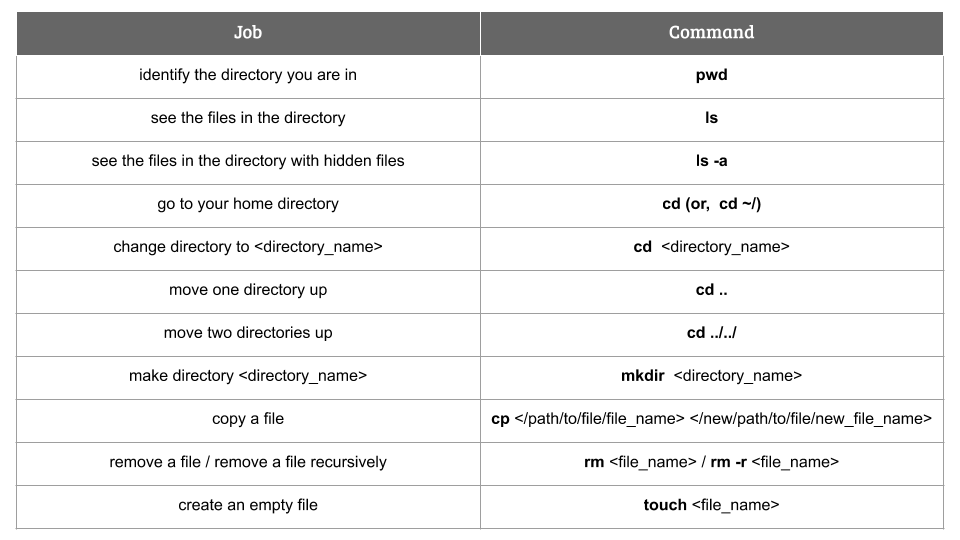

In [144]:
Image(filename='extras/linux_tutorial_page1.png')

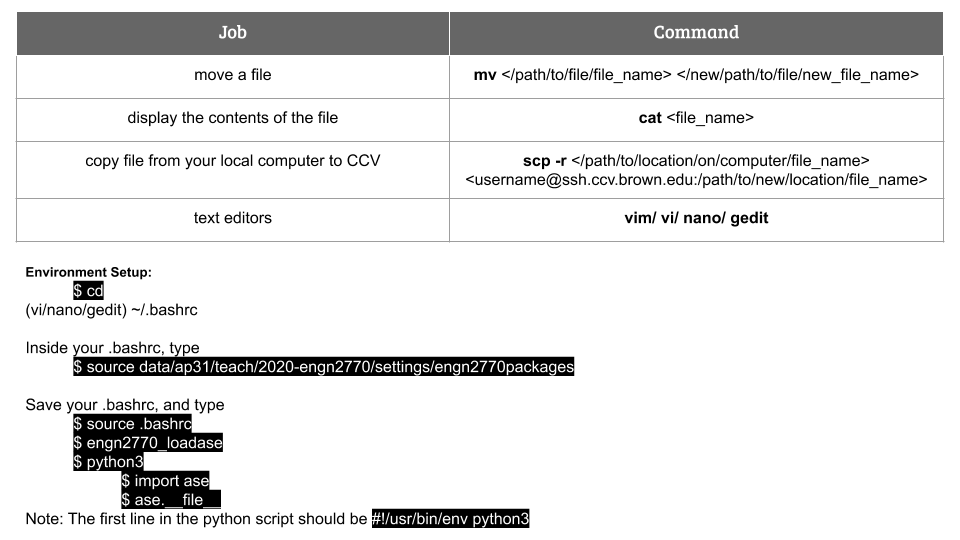

In [145]:
Image(filename='extras/linux_tutorial_page2.png')

## B) Python 

### Basic arithmetic

In [1]:
# Basic arithmetic
a = 2.
b = 3.

print(a + b)

5.0


In [2]:
# square of a number
sq = a**2
print(sq)

4.0


In [96]:
# division & % 
print(4./2)

# remainder of a division
print(15.%8)
print(8.%2) # If this is 0, then 8 is divisible by 2!

2.0
7.0
0.0


### Functions

In [97]:
# functions

# define add function
def add(a,b):
    return a+b

# define power function
def power(a,pow=2):
    return a**pow

# call add function
add_result = add(2.,3.)
print(add_result)

# call power function
power_result = power(5.,3)
print(power_result)

5.0
125.0


In [98]:
sum_result = sum((2.,2.))
print(sum_result)

pow_result = pow(5.,4)
print(pow_result)

4.0
625.0


### numpy, list & arrays

In [99]:
# using numpy (Numerical Python)
import numpy as np

sum_result = np.sum((2.,-3.))
print(sum_result)

power_result = np.power(2.,8)
print(power_result)

-1.0
256.0


In [100]:
# list 
things = ['a',7]

for thing in things:
    print(thing)

a
7


In [4]:
# Basic list commands

_list = [1,2,3,4]

#_list.append(5)
#_list.pop(2)
#_list.reverse()

print(_list)

[4, 3, 2, 1]


In [102]:
import numpy as np

# return evenly spaced numbers over a specified interval

a = np.linspace(1,12,12)
print(a)
print(a.shape)

# convert a 1D array into 2D 
a.reshape(3,4)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
(12,)


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

### For loop & conditional statements

In [103]:
# for loops
for element in range(5):
    print(element, element**2)

0 0
1 1
2 4
3 9
4 16


In [104]:
# For loops with conditional statements

dice = [1,2,3,4,5,6]

type_list = []

for roll in dice:
    if roll % 2 == 0: 
        type_list.append('even')
    else:
        type_list.append('odd')

print(type_list)

['odd', 'even', 'odd', 'even', 'odd', 'even']


In [105]:
num = np.linspace(0,10,11)
print(num)

doubled_list = []

for element in num:
    if element > 5:
        doubled_list.append(element*2)

print(doubled_list)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12.0, 14.0, 16.0, 18.0, 20.0]


In [106]:
# For loop with conditional statement in one line

num = np.linspace(0,10,11)
print(num)

doubled = [element * 2 for element in num if element>5]
print(doubled)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12.0, 14.0, 16.0, 18.0, 20.0]


In [107]:
long_words = ['platinum', 'hi', 'carbon', 'welcome', 'hydrogen', 'neptune', 'covid', 'python']

# checks and stores into new list based on length of a word
short_words = [word for word in long_words if len(word) < 6]

short_words

['hi', 'covid']

## C) Atomic Simutlation Environment 

In [108]:
# Some basic packages we will need throughout

import numpy as np

import ase
from ase.parallel import paropen
from ase.io import read, write
from ase.visualize import view

# Plotting and image visualizing in Jupyter Notebook
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

# Module 1: Atom / Atoms

In [109]:
from ase import Atom, Atoms

In [110]:
#atom = Atom?

In [111]:
atom = Atom('O')
atom.mass = 16
atom.charge = -2 
atom.position = (0,2,3)
#atom.symbol
#atom.x
#atom.y

In [112]:
#Atoms?

In [113]:
d = 1.104 # N2 bondlength

# The following three are equivalent
N2 = Atoms('N2', [(0, 0, 0), (0, 0, d)])
N2 = Atoms(numbers=[7, 7], positions=[(0, 0, 0), (0, 0, d)])
N2 = Atoms([Atom('N', (0, 0, 0)), Atom('N', (0, 0, d))])

# to save and view a snapshot
write('extras/n2.png', N2, rotation='-80y')
Image(filename='extras/n2.png')

# to have a 3D view in notebook
#view(N2, viewer='x3d')


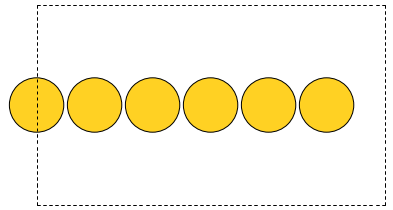

In [114]:
d = 2.9
L = 10.0
wire = Atoms('Au',
             positions=[[0, L / 2., L / 2.]],
             cell=[d, L, L],
             pbc=[1, 0, 0])

wire.get_chemical_symbols()

# to save and view a snapshot
write('extras/wire.png', wire * (6,1,1))
Image(filename='extras/wire.png') 

#view(wire*(6,1,1), viewer='x3d')
#view(wire*(6,1,1))

# Module 2: Build (molecule, bulk, surfaces)

['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H', 'H']
C2H6O
[[ 1.168181 -0.400382  0.      ]
 [ 0.        0.559462  0.      ]
 [-1.190083 -0.227669  0.      ]
 [-1.946623  0.381525  0.      ]
 [ 0.042557  1.207508  0.886933]
 [ 0.042557  1.207508 -0.886933]
 [ 2.115891  0.1448    0.      ]
 [ 1.128599 -1.037234  0.885881]
 [ 1.128599 -1.037234 -0.885881]]


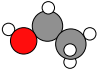

In [115]:
from ase.build import molecule

m = molecule('CH3CH2OH')
print(m.get_chemical_symbols())
print(m.get_chemical_formula())
print(m.get_positions())

# to save and view a snapshot
write('extras/ethanol.png', m, rotation='-20x')
Image(filename='extras/ethanol.png',width=150)

#view(m, viewer='x3d')

# Optimize lattice constant

Cell([3.6, 3.6, 3.6])


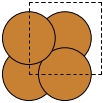

In [116]:
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.io import Trajectory

a0 = 3.6
cu = bulk('Cu', 'fcc', a=a0, cubic=True)

print(cu.get_cell())

# to save and view a snapshot
write('extras/cu.png', cu)
Image(filename='extras/cu.png',width=150)
#view(cu)

In [117]:
# create an empty list to store energy
energy_list = []

# start with a good guess
# and create a list with fluctuations in a.

a0 = 3.6
a_list = a0 + np.linspace(-0.2, 0.2, 101)

# For loop to use each and every value of a
# and calculate & store the potential energy

for a in a_list:
    cu = bulk('Cu', 'fcc', a=a, cubic=True)
    cu.set_calculator(EMT())
    e = cu.get_potential_energy()
    energy_list.append(e)
    

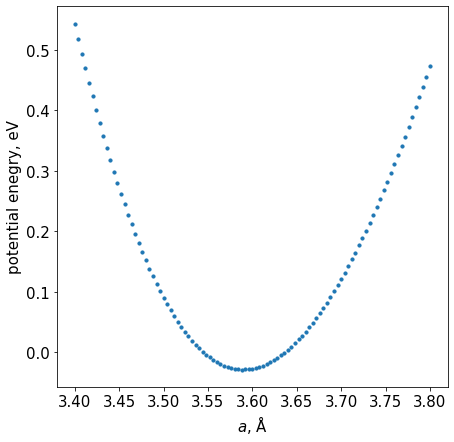

In [118]:
# plotting using matplotlib (https://matplotlib.org/)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(a_list, energy_list, marker='o', s=10)
plt.xlabel('$a$, $\mathrm{\AA}$', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('potential enegry, eV', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [119]:
# index corresponding to the lowest energy

index = energy_list.index(min(energy_list))
lc = a_list[index]
print(lc)

3.588


# Module 3:  Surface, Constraints

In [131]:
from ase.build import fcc111
from ase.constraints import FixAtoms

In [132]:
#fcc111? 

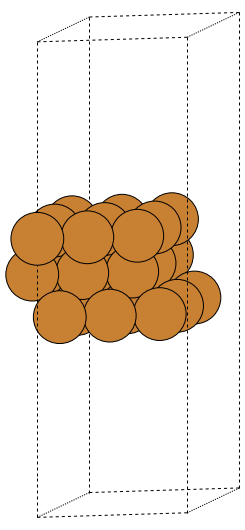

In [133]:
# Create a slab using build
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

# Use of constraints, here, Fix the bottom most layer
indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

# Note that the constraint is not visible through 
# the following method

write('extras/cu_slab.png', slab, rotation='10z,-80x')
Image(filename='extras/cu_slab.png') 

#view(slab, viewer='x3d')
#view(slab)

# Module 4: Add an adsorbate 

##### method 1

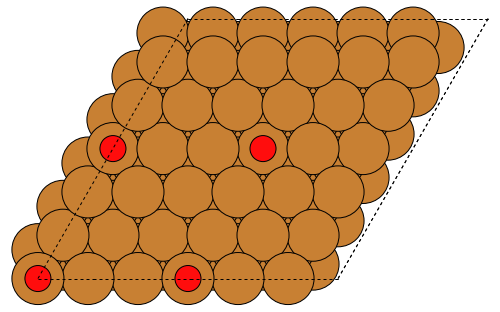

In [134]:
from ase.build import add_adsorbate

slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'ontop')

write('extras/slab_with_adsorbate.png', slab * (2, 2, 1))
Image(filename='extras/slab_with_adsorbate.png') 

##### method 2

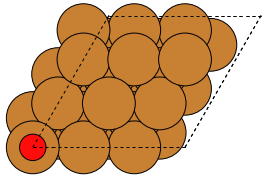

In [135]:
a = 3.558
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

adsorbate = Atom('O')
adsorbate.position = slab[18].position + (0,0,2)

slab_with_add = slab + adsorbate

#view(slab_with_add)

write('extras/slab_with_adsorbate.png', slab_with_add)
Image(filename='extras/slab_with_adsorbate.png') 

# Module 5: Structure optimization using EMT

In [136]:
from ase.constraints import FixAtoms
from ase.build import fcc111, add_adsorbate
from ase.calculators.emt import EMT
from ase.optimize import BFGS

# Construct a slab with optimized lattice constant
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
# Periodic boundary conditions
slab.set_pbc((1,1,0))

# Construct & add an adosorbate
adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'ontop')

# Fix atoms
indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

# Calculator
calc = EMT()
slab.set_calculator(calc)

# Optimization
opt = BFGS(slab, logfile='qn.log', trajectory='qn.traj')
opt.run(fmax=0.01)

True

In [138]:
#relaxed_slab = read('qn.traj')
#view(relaxed_slab)

In [139]:
myfile = open("qn.log",'r')
txt = myfile.read()
print(txt)

      Step     Time          Energy         fmax
BFGS:    0 11:41:50        6.520552        0.9096
BFGS:    1 11:41:50        6.505566        0.4225
BFGS:    2 11:41:50        6.501307        0.0559
BFGS:    3 11:41:51        6.501107        0.0437
BFGS:    4 11:41:51        6.500731        0.0845
BFGS:    5 11:41:51        6.500402        0.0943
BFGS:    6 11:41:51        6.500170        0.0693
BFGS:    7 11:41:51        6.500026        0.0385
BFGS:    8 11:41:51        6.499856        0.0668
BFGS:    9 11:41:51        6.499623        0.0791
BFGS:   10 11:41:51        6.499416        0.0562
BFGS:   11 11:41:52        6.499321        0.0183
BFGS:   12 11:41:52        6.499287        0.0128
BFGS:   13 11:41:52        6.499261        0.0155
BFGS:   14 11:41:52        6.499236        0.0165
BFGS:   15 11:41:52        6.499223        0.0082
      Step     Time          Energy         fmax
BFGS:    0 11:41:52        6.570523        1.7805
BFGS:    1 11:41:53        6.508532        1.5692
BF

In [140]:
from ase.constraints import FixAtoms
from ase.build import fcc111, add_adsorbate
from ase.calculators.emt import EMT
from ase.optimize import BFGS

slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

adsorbate = Atom('O')
add_adsorbate(slab, adsorbate, 1.8, 'hcp')

indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

calc = EMT()

slab.set_calculator(calc)

opt = BFGS(slab, logfile='qn.log', trajectory='qn.traj')
opt.run(fmax=0.01)

True

In [141]:
myfile = open("qn.log",'r')
txt = myfile.read()
print(txt)

      Step     Time          Energy         fmax
BFGS:    0 11:41:50        6.520552        0.9096
BFGS:    1 11:41:50        6.505566        0.4225
BFGS:    2 11:41:50        6.501307        0.0559
BFGS:    3 11:41:51        6.501107        0.0437
BFGS:    4 11:41:51        6.500731        0.0845
BFGS:    5 11:41:51        6.500402        0.0943
BFGS:    6 11:41:51        6.500170        0.0693
BFGS:    7 11:41:51        6.500026        0.0385
BFGS:    8 11:41:51        6.499856        0.0668
BFGS:    9 11:41:51        6.499623        0.0791
BFGS:   10 11:41:51        6.499416        0.0562
BFGS:   11 11:41:52        6.499321        0.0183
BFGS:   12 11:41:52        6.499287        0.0128
BFGS:   13 11:41:52        6.499261        0.0155
BFGS:   14 11:41:52        6.499236        0.0165
BFGS:   15 11:41:52        6.499223        0.0082
      Step     Time          Energy         fmax
BFGS:    0 11:41:52        6.570523        1.7805
BFGS:    1 11:41:53        6.508532        1.5692
BF

# Module 6: Calculate Barriers using nudged elastic band (NEB)

In [142]:
from ase.neb import NEB
from ase.optimize import BFGS
from ase.calculators.emt import EMT

# Create a bare slab
slab = fcc111('Cu', size=(3,3,3), a=3.588, vacuum=10)
slab.set_pbc((1,1,0))

indices=[atom.index for atom in slab if atom.tag == 3]
constraint = FixAtoms(indices)
slab.set_constraint(constraint)

slab.set_calculator(EMT())

opt = BFGS(slab, logfile='bare_slab.log', trajectory='bare_slab.traj')
opt.run(fmax=0.01)

# create an adsorbate
adsorbate = Atom('O')

#######################################
###### SLAB 1: Cu with O in fcc (position 1) #######
#######################################

initial = slab + adsorbate
initial[-1].position = initial[18].position + (1.3,0.8,1)

initial.set_calculator(EMT())
opt = BFGS(initial, logfile='initial.log', trajectory='initial.traj')
opt.run(fmax=0.01)


####################################################
###### SLAB 1: Cu with O in fcc (position 2) #######
####################################################
final = slab + adsorbate
final[-1].position = final[19].position + (1.3, 0.8, 1)

final.set_calculator(EMT())
opt = BFGS(final, logfile='final.log', trajectory='final.traj')
opt.run(fmax=0.01)

n = 10

images = [initial]
for i in range(n):
    image = initial.copy()
    image.set_calculator(EMT())
    image.get_potential_energy()
    image.get_forces()
    images.append(image)

images.append(final)

neb = NEB(images)
neb.interpolate()

qn = BFGS(neb,logfile='neb.log', trajectory='neb.traj')
qn.run(fmax=0.05)    

True